In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import StratifiedKFold, train_test_split #,RandomizedSearchCV
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #,classification_report, confusion_matrix, 

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
titles=["SPb", "Sochi", "UBK"]

In [3]:
data_list=[]
for i in range(0, len(titles)):
    title=titles[i]
    fname=title+"reviews_tokenized.csv"
    data=pd.read_csv(fname)
    data.text=data.text.astype('str')
    data_list.append(data)

In [10]:
len(data_list[0])

6199

In [143]:
TF_IDF =[]
data_tfidf=[]
for i in range(0,len(data_list)):
    tfidf=TfidfVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.1, norm=None) #(stop_words=stop, ngram_range=(1, 2), min_df=2, max_df=0.5, norm=None)
    data_tfidf.append(tfidf.fit_transform(data_list[i].text))
    TF_IDF.append(tfidf)

In [96]:
for d in data_list:
    print(len(d))

6199
3311
4574


In [113]:
from sklearn.decomposition import PCA

In [264]:
print(data_tfidf[0].todense().shape,
data_tfidf[1].todense().shape,
data_tfidf[2].todense().shape)

(6199, 9088) (3311, 7566) (4574, 11398)


In [265]:
reducedData=[]
pca_list=[]
for d in data_tfidf:
    pca=(PCA(n_components=3))
    reducedData.append(pca.fit_transform(d.todense()))
    pca_list.append(pca)

In [266]:
for pca in pca_list:
    print(pca.explained_variance_ratio_)

[0.01878074 0.00774134 0.00586267]
[0.02890751 0.00912625 0.00736265]
[0.0261784  0.00875415 0.00764028]


In [267]:
DFs=[]
for d in reducedData:
    DFs.append(pd.DataFrame(d, columns=['X','Y','Z']))

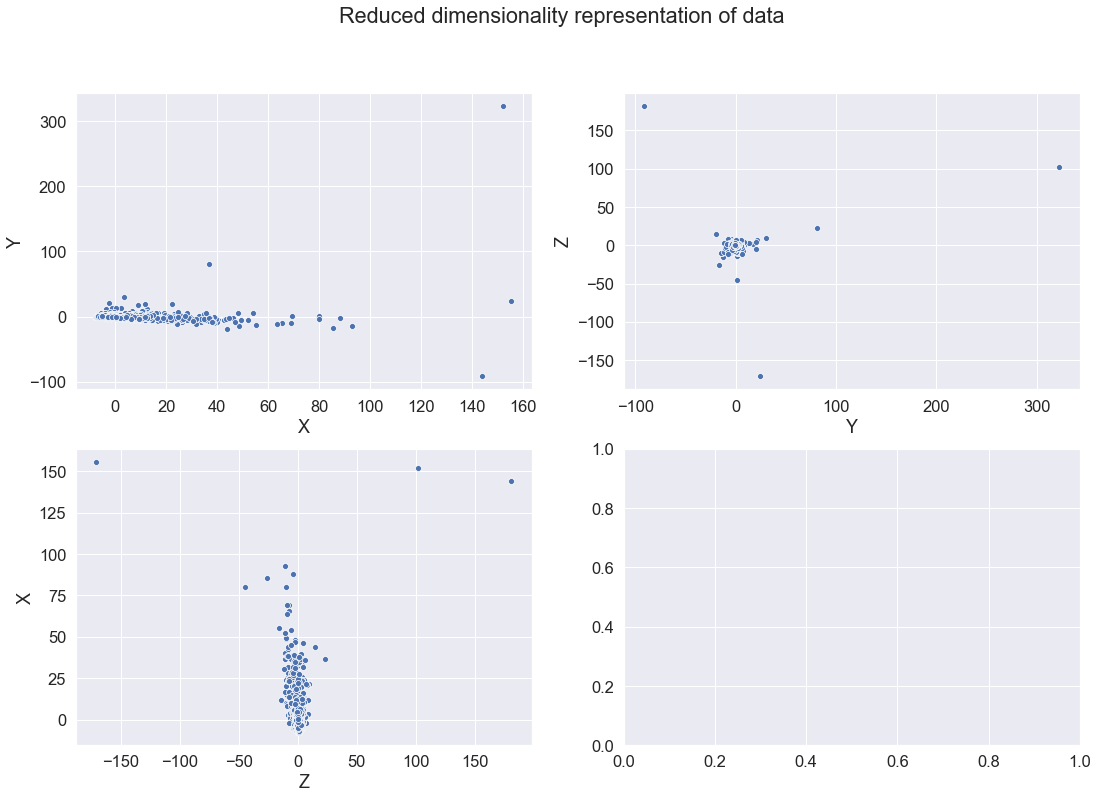

In [270]:
reducedDF=DFs[2]
fig,ax=plt.subplots(figsize=(18,12),nrows=2,ncols=2)
fig.suptitle('Reduced dimensionality representation of data')
sns.set(font_scale=1.5)
plt.subplot(2,2,1)
sns.scatterplot(x=reducedDF.loc[:,'X'],y=reducedDF.loc[:,'Y'])
plt.subplot(2,2,2)
sns.scatterplot(x=reducedDF.loc[:,'Y'],y=reducedDF.loc[:,'Z'])
plt.subplot(2,2,3)
sns.scatterplot(x=reducedDF.loc[:,'Z'],y=reducedDF.loc[:,'X'])

In [271]:
from sklearn.cluster import DBSCAN

## Сочи

In [273]:
model = DBSCAN(10.0)
model.fit(reducedData[1])

DBSCAN(algorithm='auto', eps=10.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [249]:
Sochi_ano=model.labels_

In [250]:
Sochi_ano=pd.Series(data=Sochi_ano)

In [251]:
Sochi_ano.value_counts()

 0    3293
-1      18
dtype: int64

In [252]:
Sochi_ano_index=Sochi_ano.loc[Sochi_ano!=0].index

In [253]:
Sochi_raw=pd.read_csv("Sochireviews_cleaned.csv")

In [254]:
Sochi_ano_rev=Sochi_raw.loc[Sochi_ano_index,:]

In [255]:
len(Sochi_ano_rev)

18

(array([3., 2., 4., 2., 5., 0., 0., 1., 0., 1.]),
 array([ 3619. ,  6119.1,  8619.2, 11119.3, 13619.4, 16119.5, 18619.6,
        21119.7, 23619.8, 26119.9, 28620. ]),
 <a list of 10 Patch objects>)

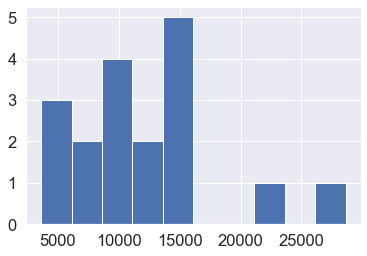

In [256]:
plt.hist(Sochi_ano_rev.text.apply(lambda x: len(x)))

(array([11.,  4.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <a list of 10 Patch objects>)

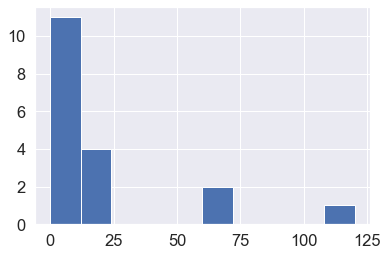

In [257]:
plt.hist(Sochi_ano_rev.time_delta)

(array([6., 0., 0., 0., 0., 6., 0., 0., 0., 6.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

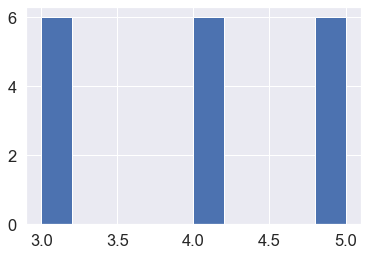

In [258]:
plt.hist(Sochi_ano_rev.mark)

In [260]:
Sochi_ano_rev.reference.value_counts()

https://tophotels.ru/hotel/al10568/reviews     3
https://tophotels.ru/hotel/al35443/reviews     2
https://tophotels.ru/hotel/al36527/reviews     2
https://tophotels.ru/hotel/al196181/reviews    2
https://tophotels.ru/hotel/al306013/reviews    1
https://tophotels.ru/hotel/al197236/reviews    1
https://tophotels.ru/hotel/al70606/reviews     1
https://tophotels.ru/hotel/al10580/reviews     1
https://tophotels.ru/hotel/al100557/reviews    1
https://tophotels.ru/hotel/al18085/reviews     1
https://tophotels.ru/hotel/al41007/reviews     1
https://tophotels.ru/hotel/al125434/reviews    1
https://tophotels.ru/hotel/al50790/reviews     1
Name: reference, dtype: int64

In [262]:
Sochi_ano_rev.head(20)

,reference,user,mark,time_delta,text,conv_date
791,https://tophotels.ru/hotel/al36527/reviews,281056,4,9,Доброго всем времени суток.\r\n\r\nЗАСЕЛЕНИЕ Р...,2017-03-10
811,https://tophotels.ru/hotel/al36527/reviews,1295074,3,60,"Пока свежи воспоминания, напишу отзыв. Кстати ...",2016-11-21
1194,https://tophotels.ru/hotel/al18085/reviews,1776639,3,0,Отель Спутник был выбран исходя из впечатлений...,2019-01-16
1273,https://tophotels.ru/hotel/al35443/reviews,74371,5,1,Мы отдыхали в этом отеле с 30 июня по 7 июля в...,2016-08-07
1293,https://tophotels.ru/hotel/al35443/reviews,371024,4,8,ИЗ АЭРОПОРТА:\r\nДобрались очень просто…на авт...,2015-05-13
1460,https://tophotels.ru/hotel/al125434/reviews,1356470,5,3,Рекомендация.........\r\nХороший отель с прогр...,2019-12-03
1530,https://tophotels.ru/hotel/al10568/reviews,626655,5,19,"Начну свой отзыв об этом месте с того, с чего ...",2018-08-09
1583,https://tophotels.ru/hotel/al10568/reviews,0,3,13,Добрый день! Пишу отзыв для туристов тщательно...,2014-01-14
1584,https://tophotels.ru/hotel/al10568/reviews,0,3,60,Если только в двух словах об «отдыхе» в «Запол...,2013-09-16
1611,https://tophotels.ru/hotel/al70606/reviews,714686,3,6,Отдыхали вдвоем с ребенком 9 лет. Вернулись из...,2018-07-31


In [263]:
Sochi_ano_rev.iloc[0,4]

'Доброго всем времени суток.\r\n\r\nЗАСЕЛЕНИЕ РАЗМЕЩЕНИЕ\r\n\r\n          Заселение прошло быстро. На ресепшене нас попросили предъявить наши путёвки и паспорта и подождать в холе. Через непродолжительное время нам дали ключи от номера и сказали куда идти. Провожать нас до номера нас никто не стал. Благо, что номер был в том же здании что и ресепшн, поэтому идти оказалось не далеко. Только паспорта и документы нам сразу не отдали, а сказали, что за ними можно будет подойти через часа полтора, так как им нужно время чтобы всё оформить. Никакой информации, как для вновь прибывшим нам не предоставили. И нам пришлось самим спрашивать у других отдыхающих такие элементарные вопросы как где ресторан, где лечебные корпуса, как пройти на море, где бассейн и так далее. Странно, обычно во всех нормальных отелях на следующих день всех собирают и дают всю необходимую информацию. Здесь же они себя этим не утруждают. Мол сами во всём разберётесь. Это можно смело записать в минус работы администрации 

## Крым

In [274]:
model = DBSCAN(10.0)
model.fit(reducedData[2])

DBSCAN(algorithm='auto', eps=10.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [275]:
UBK_ano=model.labels_

In [276]:
UBK_ano=pd.Series(data=UBK_ano)

In [277]:
UBK_ano.value_counts()

 0    4551
-1      23
dtype: int64

In [278]:
UBK_ano_index=UBK_ano.loc[UBK_ano!=0].index

In [279]:
UBK_raw=pd.read_csv("UBKreviews_cleaned.csv")

In [280]:
UBK_ano_rev=UBK_raw.loc[UBK_ano_index,:]

In [281]:
len(UBK_ano_rev)

23

(array([1., 2., 2., 4., 7., 3., 2., 0., 0., 2.]),
 array([ 1985. ,  4827.4,  7669.8, 10512.2, 13354.6, 16197. , 19039.4,
        21881.8, 24724.2, 27566.6, 30409. ]),
 <a list of 10 Patch objects>)

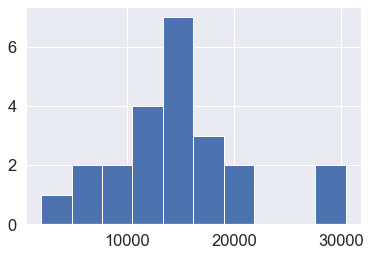

In [282]:
plt.hist(UBK_ano_rev.text.apply(lambda x: len(x)))

(array([16.,  3.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

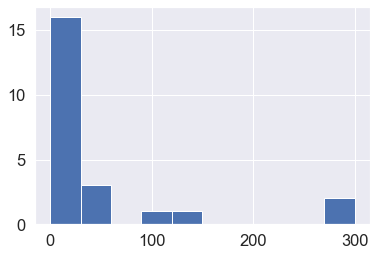

In [283]:
plt.hist(UBK_ano_rev.time_delta)

(array([ 5.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  6.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

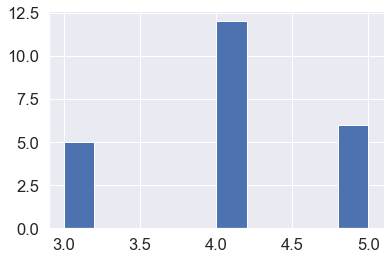

In [284]:
plt.hist(UBK_ano_rev.mark)

In [285]:
UBK_ano_rev.reference.value_counts()

https://tophotels.ru/hotel/al19774/reviews    6
https://tophotels.ru/hotel/al35508/reviews    4
https://tophotels.ru/hotel/al19743/reviews    3
https://tophotels.ru/hotel/al19748/reviews    2
https://tophotels.ru/hotel/al19739/reviews    2
https://tophotels.ru/hotel/al84868/reviews    1
https://tophotels.ru/hotel/al41782/reviews    1
https://tophotels.ru/hotel/al19780/reviews    1
https://tophotels.ru/hotel/al40340/reviews    1
https://tophotels.ru/hotel/al84057/reviews    1
https://tophotels.ru/hotel/al19752/reviews    1
Name: reference, dtype: int64

In [286]:
UBK_ano_rev.head(25)

,reference,user,mark,time_delta,text,conv_date
176,https://tophotels.ru/hotel/al19743/reviews,129018,5,30,Новое крымское утро настойчиво прогоняет ночно...,2017-07-29
198,https://tophotels.ru/hotel/al19743/reviews,1134488,5,90,Porto Mare - лучший отель для семейного отдыха...,2015-12-20
228,https://tophotels.ru/hotel/al19743/reviews,0,5,3,У любого человека из пост-советского пространс...,2013-11-29
327,https://tophotels.ru/hotel/al35508/reviews,1457790,3,300,"КРАТКИЙ ОТЗЫВ территория отеля на 3ку, номера...",2017-02-08
395,https://tophotels.ru/hotel/al35508/reviews,1240337,3,0,"Отдыхали с сыном 6-ти лет в пансионате ""Нева"" ...",2016-10-08
562,https://tophotels.ru/hotel/al19774/reviews,1223518,4,0,"Всем добрый день, отзыв пишу находясь в отеле ...",2016-07-18
653,https://tophotels.ru/hotel/al19774/reviews,120948,4,2,В этом году с отдыхом у нас не случилось из-за...,2014-08-26
657,https://tophotels.ru/hotel/al19774/reviews,227889,4,10,"Доброго времени суток всем, кто читает мой отз...",2014-07-14
1079,https://tophotels.ru/hotel/al35508/reviews,1457790,3,300,"КРАТКИЙ ОТЗЫВ территория отеля на 3ку, номера...",2017-02-08
1147,https://tophotels.ru/hotel/al35508/reviews,1240337,3,0,"Отдыхали с сыном 6-ти лет в пансионате ""Нева"" ...",2016-10-08


In [287]:
UBK_ano_rev.iloc[3,4]

'КРАТКИЙ ОТЗЫВ  территория отеля на 3ку, номера  3 (за слышимость и сломанный унитаз), уборка в номерах  2, пляж  1, опасный для жизни и здоровья отдыхающих, сервис  3, питание  2, худшее питание в отеле за все мои отпуска! Анимация  4. За подробностями  читайте ниже.\r\nОтдыхали в пансионате Нева с мужем в начале сентября 2016 года. Когда выбирали отель внимательно изучили отзывы и рейтинги на этом и других сайтах и на основании хорошего рейтинга и большинства положительных отзывов выбрали пансионат Нева И как же мы ошиблись \r\nНачалось все с заезда  мы заказывали трансфер , при заказе было указано что нас доставят и вещи наши в номер поднимут, по факту  мы их тащили сами по всем 5ти лестницам тяжеленные 25кг чемоданы. Причем, лестницы эти достаточно крутые, а ступеньки кое-где уже отбитые и навернуться с них  раз плюнуть. И освещение на этих лестницах отсутствует, поэтому навернуться вечером в темноте еще проще! Да, ТЕРРИТОРИЯ отеля не маленькая, несколько пешеходных дорожек, но все

# Итак, "аномалии" в TF-IDF - это очень длинные отзывы, в которых много необычных слов